# Import Libraries

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.core.display import display,HTML
import os

# Prepare Data(Picture)

In [2]:
file_path = os.getcwd()
print(file_path)

C:\Users\PNCOM\Desktop\ML\MLPC\pokemon-v3 CNN


In [3]:
#Import test/train pictures
imgfiles = [i for i in os.listdir(file_path) if i.startswith("TT")]
print(imgfiles)

['TTflying01.png', 'TTflying02.png', 'TTflying03.png', 'TTflying04.png', 'TTflying05.png', 'TTflying06.png', 'TTflying07.png', 'TTflying08.png', 'TTflying09.png', 'TTflying10.png', 'TTflying11.png', 'TTflying12.png', 'TTflying13.png', 'TTflying14.png', 'TTflying15.png', 'TTflying16.png', 'TTflying17.png', 'TTflying18.png', 'TTflying19.png', 'TTflying20.png', 'TTflying21.png', 'TTflying22.png', 'TTflying23.png', 'TTflying24.png', 'TTflying25.png', 'TTflying26.png', 'TTflying27.png', 'TTflying28.png', 'TTflying29.png', 'TTflying30.png', 'TTflying31.png', 'TTflying32.png', 'TTflying33.png', 'TTflying34.png', 'TTflying35.png', 'TTflying36.png', 'TTflying37.png', 'TTflying38.png', 'TTflying39.png', 'TTflying40.png', 'TTflying41.png', 'TTflying42.png', 'TTflying43.png', 'TTflying44.png', 'TTflying45.png', 'TTn-flying01.png', 'TTn-flying02.png', 'TTn-flying03.png', 'TTn-flying04.png', 'TTn-flying05.png', 'TTn-flying06.png', 'TTn-flying07.png', 'TTn-flying08.png', 'TTn-flying09.png', 'TTn-flyi

In [4]:
j = 0
picture = np.zeros((90, 10000))

for i in imgfiles:
    img = Image.open(i).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((100,100), Image.ANTIALIAS)
    pixel = np.array(img)
    pixel = pixel/255.0 * 16
    pixel = pixel.astype('int')
    picture[j,:] = pixel.reshape(1,-1)
    j = j+1

# Check Picture

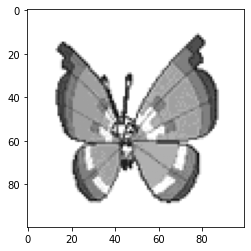

In [5]:
#fig = plt.figure(figsize = (2, 2))
plt.imshow(picture[40].reshape(100, 100), cmap=plt.cm.binary )

# Input type of  each picture

In [6]:
y = [ 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying'
      , 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying'
      , 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying'
      , 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'non-flying', 'non-flying'
      , 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying'
      , 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying'
      , 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying'
      , 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying'
      , 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying'
      , 'non-flying', 'non-flying', 'non-flying']

In [7]:
print(len(y))

90


# Split Data into train-test set

In [8]:
X = picture
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=7 )

In [9]:
print(len(X_test))
print(len(y_test))
print(len(X_train))
print(len(y_train))

18
18
72
72


# Fit model

In [10]:
model = MLPClassifier()
model.fit(X_train, y_train)

MLPClassifier()

In [11]:
y_predict = model.predict(X_test)

In [12]:
df = pd.DataFrame (data = y_test, columns = ['Test'])
df[' predicted '] = y_predict
df

,Test,predicted
0,flying,flying
1,non-flying,non-flying
2,flying,flying
3,flying,flying
4,flying,flying
5,flying,flying
6,flying,flying
7,non-flying,non-flying
8,flying,flying
9,flying,flying


In [13]:
print('Accuracy (%) :{:.2f}% \n'.format(accuracy_score(y_test, y_predict)*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict))
print('\n Classification Report \n',classification_report(y_test, y_predict))

Accuracy (%) :94.44% 

Confusion Matrix:
 [[12  1]
 [ 0  5]]

 Classification Report 
               precision    recall  f1-score   support

      flying       1.00      0.92      0.96        13
  non-flying       0.83      1.00      0.91         5

    accuracy                           0.94        18
   macro avg       0.92      0.96      0.93        18
weighted avg       0.95      0.94      0.95        18



In [14]:
cvs = cross_val_score(model, X, y, cv = 5)
print(cvs)
cvs.mean()

[0.94444444 0.83333333 0.88888889 0.94444444 1.        ]


0.9222222222222222

# Predict with unseen pictures

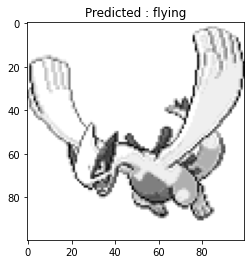

In [15]:
#Check Prediction with picture
model.fit(X, y)
unseen = 'UNflyingtest01.png'
img = Image.open(unseen).convert('L')
img = ImageOps.invert(img)
img = img.resize((100,100), Image.ANTIALIAS)
pixel = np.array(img)
pixel = pixel/255.0 * 16
pixel = pixel.astype('int')
pic = pixel.reshape(1,-1)
predict = model.predict(pic)
plt.imshow(pixel, cmap=plt.cm.binary)
plt.title('Predicted : {}'.format(predict[0]))
plt.show()

In [16]:
#Import unseen pictures
unseenpic = [i for i in os.listdir(file_path) if i.startswith("UN")]
print(unseenpic)

['UNflyingtest01.png', 'UNflyingtest02.png', 'UNflyingtest03.png', 'UNflyingtest04.png', 'UNflyingtest05.png', 'UNflyingtest06.png', 'UNflyingtest07.png', 'UNflyingtest08.png', 'UNn-flyingtest01.png', 'UNn-flyingtest02.png', 'UNn-flyingtest03.png', 'UNn-flyingtest04.png', 'UNn-flyingtest05.png', 'UNn-flyingtest06.png', 'UNn-flyingtest07.png', 'UNn-flyingtest08.png']


In [17]:
k=0
testpic = np.zeros((16, 10000))

for i in unseenpic:
    img = Image.open(i).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((100,100), Image.ANTIALIAS)
    pixel = np.array(img)
    pixel = pixel/255.0 * 16
    pixel = pixel.astype('int')
    testpic[k,:] = pixel.reshape(1,-1)
    predicttest = model.predict(testpic)
    k = k+1

In [18]:
print(predicttest)

['flying' 'flying' 'flying' 'flying' 'flying' 'flying' 'flying'
 'non-flying' 'non-flying' 'non-flying' 'non-flying' 'non-flying'
 'non-flying' 'non-flying' 'non-flying' 'non-flying']


In [19]:
#Create table
df2 = pd.DataFrame(columns = ['Files'])
images = ['https://img.pokemondb.net/sprites/black-white/normal/lugia.png',
          'https://img.pokemondb.net/sprites/black-white/normal/braviary.png',
         'https://img.pokemondb.net/sprites/black-white/normal/venomoth.png',
          'https://img.pokemondb.net/sprites/diamond-pearl/normal/pelipper.png',
         'https://img.pokemondb.net/sprites/diamond-pearl/normal/xatu-f.png',
          'https://img.pokemondb.net/sprites/black-white/normal/togekiss.png',
          'https://img.pokemondb.net/sprites/diamond-pearl/normal/gligar-f.png',
          'https://img.pokemondb.net/sprites/black-white/normal/yanma.png',
          'https://img.pokemondb.net/sprites/black-white/normal/bisharp.png',
         'https://img.pokemondb.net/sprites/black-white/normal/genesect.png',
          'https://img.pokemondb.net/sprites/black-white/normal/floatzel.png',
         'https://img.pokemondb.net/sprites/black-white/normal/fraxure.png',
         'https://img.pokemondb.net/sprites/black-white/normal/sceptile.png',
         'https://img.pokemondb.net/sprites/black-white/normal/registeel.png',
         'https://img.pokemondb.net/sprites/black-white/normal/wigglytuff.png',
         'https://img.pokemondb.net/sprites/black-white/normal/typhlosion.png'] 


df2['Images'] = images

def path_to_image_html(path):
    return '<img src="'+ path + '" width="80" >'

df2['Files'] = unseenpic
df2['Predicted'] = predicttest

display(HTML(df2.to_html(escape=False ,formatters=dict(Images=path_to_image_html))))
display

,Files,Images,Predicted
0,UNflyingtest01.png,,flying
1,UNflyingtest02.png,,flying
2,UNflyingtest03.png,,flying
3,UNflyingtest04.png,,flying
4,UNflyingtest05.png,,flying
5,UNflyingtest06.png,,flying
6,UNflyingtest07.png,,flying
7,UNflyingtest08.png,,non-flying
8,UNn-flyingtest01.png,,non-flying
9,UNn-flyingtest02.png,,non-flying


<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>